In [1]:
#grid, spines, axels camo, ticks not rotate, no y axel, padding, storytelling with data, white background,  (sandra progressionen)

# Uppgift 0 - uppvärmning med riket

 a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_engelska = pd.read_excel("riket2023_åk9_np.xlsx", sheet_name="Engelska", skiprows=7)
df_matematik = pd.read_excel(
    "riket2023_åk9_np.xlsx", sheet_name="Matematik", skiprows=7
)
df_svenska = pd.read_excel("riket2023_åk9_np.xlsx", sheet_name="Svenska", skiprows=7)
df_svenska2 = pd.read_excel(
    "riket2023_åk9_np.xlsx", sheet_name="Svenska som andraspråk", skiprows=7
)
df_rapport = pd.read_excel(
    "riket2023_åk9_np.xlsx", sheet_name="Rapportbeskrivning och def."
)

df_matematik

,Unnamed: 0,Unnamed: 1,Antal elever med provbetyg A-F,Unnamed: 3,Unnamed: 4,Andel (%) med provbetyg A-E,Unnamed: 6,Unnamed: 7,Genomsnittlig betygspoäng,Unnamed: 9,Unnamed: 10
0,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
1,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12
2,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
3,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13,12.8,13.1
4,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


 b) Ta reda på antalet som fått F i matematik totalt, pojkar respektive flickor.

 diskussion 

In [3]:
import pandas as pd

df_matematik = pd.read_excel(
    "riket2023_åk9_np.xlsx", sheet_name="Matematik", skiprows=8
)

df_matematik = df_matematik.iloc[:, 1:-3]

df_matematik.columns = [
    "Huvudman",
    "Totalt A-F",
    "Flickor A-F",
    "Pojkar A-F",
    "Totalt i % A-E",
    "Flickor i % A-E",
    "Pojkar i % A-E",
]

df_matematik

,Huvudman,Totalt A-F,Flickor A-F,Pojkar A-F,Totalt i % A-E,Flickor i % A-E,Pojkar i % A-E
0,Samtliga,106766,51548,55218,89.1,88.7,89.5
1,Kommunal,84163,40386,43777,88.1,87.7,88.5
2,Enskild,22553,11137,11416,92.9,92.2,93.5
3,Skolverket,50,25,25,~100,~100,~100


Pojkar i % A-E X 2 VAR PROBLEMET

In [4]:
import pandas as pd

df_matematik = pd.read_excel(
    "riket2023_åk9_np.xlsx", sheet_name="Matematik", skiprows=8
)

df_matematik = df_matematik.iloc[:, 1:-3]

df_matematik.columns = [
    "Huvudman",
    "Totalt A-F",
    "Flickor A-F",
    "Pojkar A-F",
    "Totalt i % A-E",
    "Flickor i % A-E",
    "Pojkar i % A-E",
]

df_matematik["Flickor A-F"] = pd.to_numeric(df_matematik["Flickor A-F"], errors="coerce")
df_matematik["Pojkar A-F"] = pd.to_numeric(df_matematik["Pojkar A-F"], errors="coerce")
df_matematik["Flickor i % A-E"] = pd.to_numeric(df_matematik["Flickor i % A-E"], errors="coerce")
df_matematik["Pojkar i % A-E"] = pd.to_numeric(df_matematik["Pojkar i % A-E"], errors="coerce")

girls_f = round(
    df_matematik.loc[0, "Flickor A-F"]
    - df_matematik.loc[0, "Flickor A-F"]
    * (df_matematik.loc[0, "Flickor i % A-E"] / 100),
    2,
)

boys_f = round(
    df_matematik.loc[0, "Pojkar A-F"]
    - df_matematik.loc[0, "Pojkar A-F"] * (df_matematik.loc[0, "Pojkar i % A-E"] / 100),
    2,
)

print("Antal flickor med betyg F för samtliga:", girls_f)
print("Antal pojkar med betyg F för samtliga:", boys_f)


Antal flickor med betyg F för samtliga: 5824.92
Antal pojkar med betyg F för samtliga: 5797.89


  c) Rita ett stapeldiagram på totala poängen för de olika ämnena.

V.001

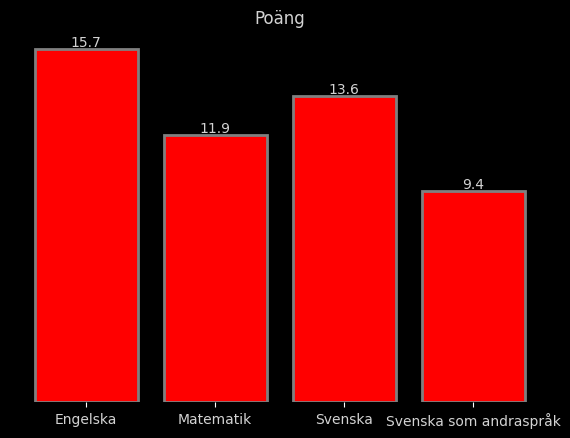

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("dark_background")

file_path = "riket2023_åk9_np.xlsx"

subjects = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]
sheets = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]

totalt = {}

for sheet, subject in zip(sheets, subjects):
    df = pd.read_excel(file_path, sheet_name=sheet, skiprows=8)
    total_average_points = df.iloc[0, -3]
    totalt[subject] = total_average_points

bars = plt.bar(totalt.keys(), totalt.values(), color="red", edgecolor="gray", linewidth=2)

plt.grid(False)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.gca().patch.set_alpha(0.0)

plt.xticks(rotation=0, color="lightgray")

plt.gca().axes.get_yaxis().set_visible(False)

plt.tight_layout(pad=3)


plt.title("Poäng", color="lightgray")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, round(height, 1),
             ha="center", va="bottom", color="lightgray")

plt.show()


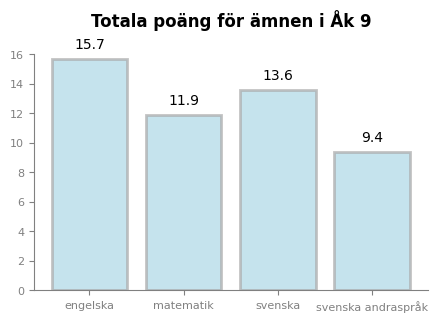

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "riket2023_åk9_np.xlsx"

subjects = ["engelska", "matematik", "svenska", "svenska andraspråk"]
sheets = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]

totalt = {}

for sheet, subject in zip(sheets, subjects):
    df = pd.read_excel(file_path, sheet_name=sheet, skiprows=8)
    total_average_points = df.iloc[0, -3]
    totalt[subject] = total_average_points

bars = plt.bar(totalt.keys(), totalt.values(), color='lightblue', edgecolor="darkgray", linewidth=2, alpha=0.7)  

plt.grid(False)

plt.gca().spines['left'].set_color('gray')  #
plt.gca().spines['bottom'].set_color('gray')  

plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  

plt.xticks(rotation=0, color="gray", fontsize=8)
plt.yticks(color="gray", fontsize=8)  

plt.gca().axes.get_yaxis().set_visible(True)  

plt.tight_layout(pad=8)

plt.title("Totala poäng för ämnen i Åk 9", color="black", fontweight='bold', pad=20)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, round(height, 1),
             ha="center", va="bottom", color="black")

plt.gcf().set_facecolor('white') 
plt.gca().set_facecolor('white')  

plt.ylim(0, 16)  

plt.gca().tick_params(axis='both', colors='gray') 

plt.show()


 d) Rita fyra olika stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen.

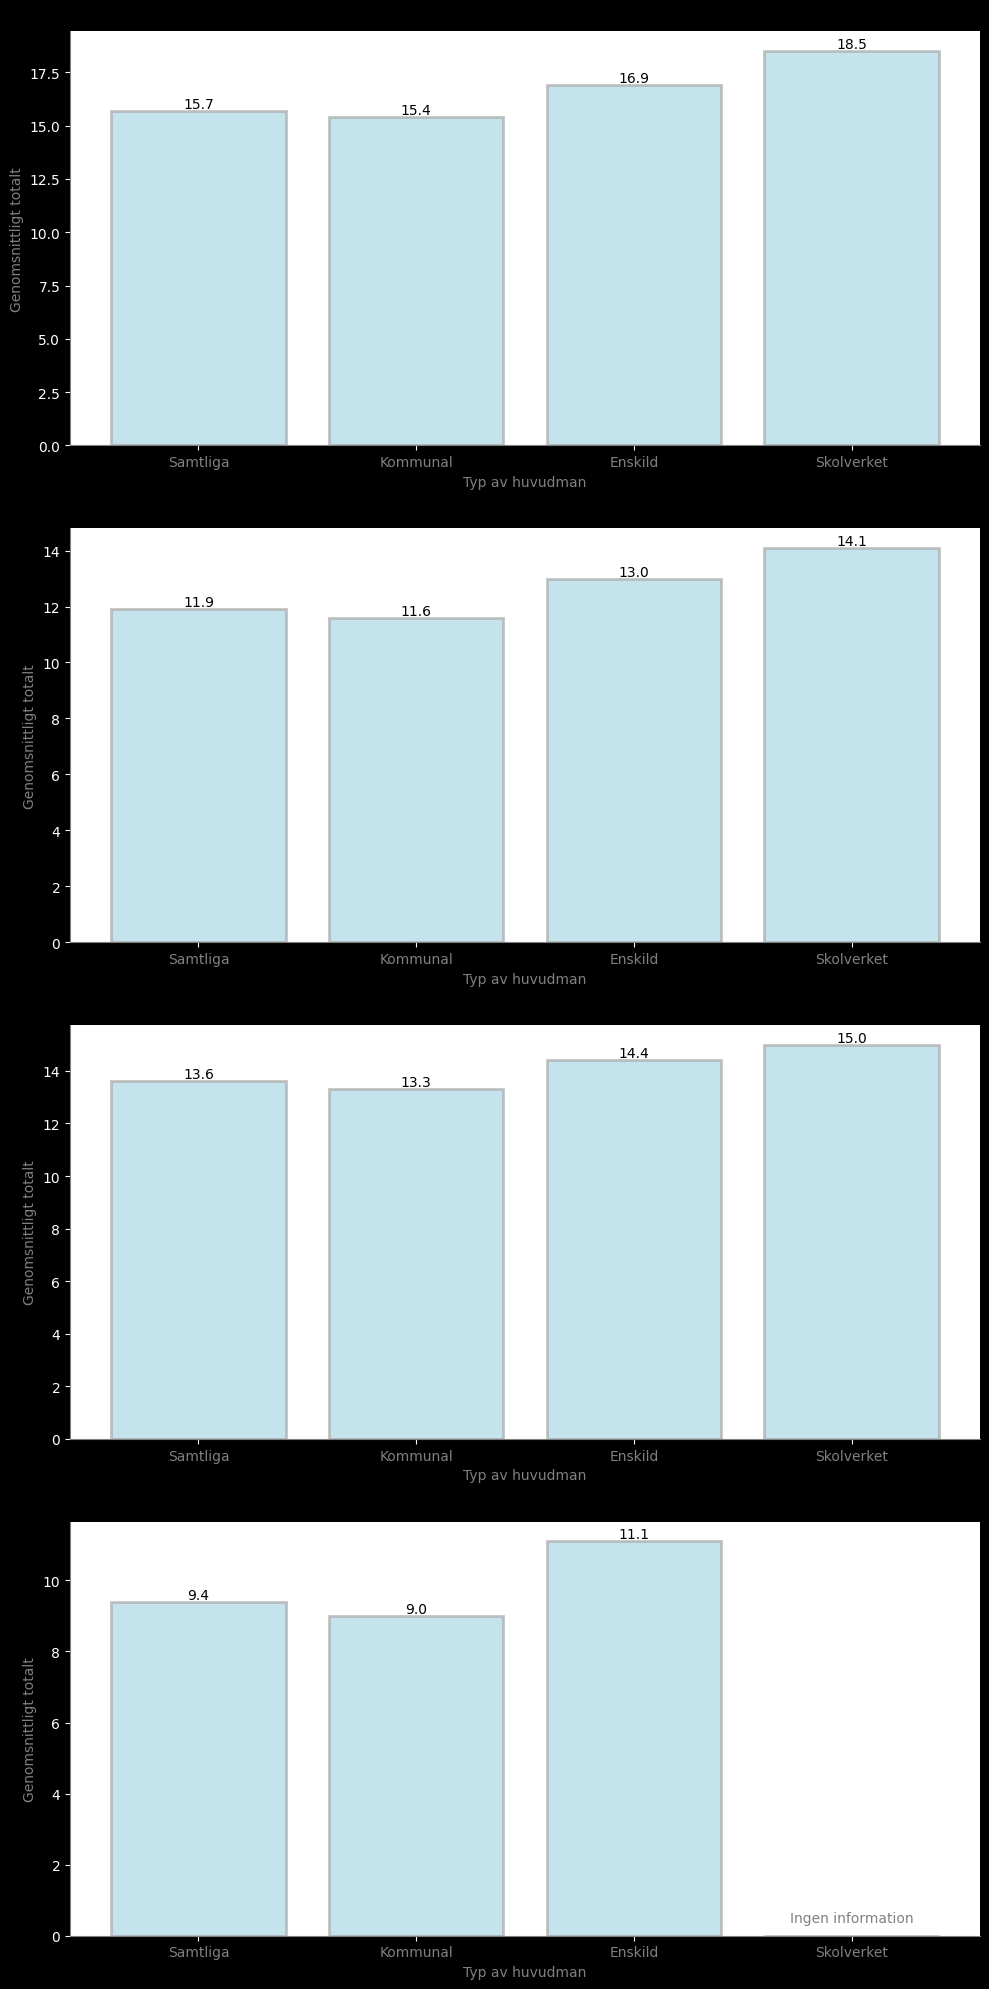

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("future.no_silent_downcasting", True)

file_path = "riket2023_åk9_np.xlsx"
dfs = pd.read_excel(file_path, sheet_name=None, skiprows=8)

new_column_names = [
    "Riket",
    "Typ av huvudman",
    "A-F Totalt", "A-F Flickor", "A-F Pojkar",
    "% Totalt", "% Flickor", "% Pojkar",
    "Genomsnittligt Totalt", "Genomsnittligt Flickor", "Genomsnittligt Pojkar"
]

for df in dfs.values():
    new_column_names_adjusted = new_column_names[:len(df.columns)]
    df.columns = new_column_names_adjusted

num_plots = len(dfs) - 1
subjects = list(dfs.keys())
subjects.remove("Rapportbeskrivning och def.")

fig, axs = plt.subplots(num_plots, 1, figsize=(10, 5*num_plots))

for i, (sheet, df) in enumerate(dfs.items()):
    if sheet == "Rapportbeskrivning och def.":
        continue
    ax = axs[i] if num_plots > 1 else axs
    ax.set_title(sheet, color="black", fontweight='bold')
    
    typ_av_huvudman = df["Typ av huvudman"]
    
    df.replace("..", 0, inplace=True)
    
    totalt = pd.to_numeric(df["Genomsnittligt Totalt"], errors="coerce")
    
    bars = ax.bar(typ_av_huvudman, totalt, color="lightblue", edgecolor="darkgray", linewidth=2, alpha=0.7)  
    
    for bar, value in zip(bars, totalt):
        if value == 0:
            ax.text(bar.get_x() + bar.get_width()/2., 0.5, "Ingen information", ha="center", va="center", color="gray")  
        else:
            ax.text(bar.get_x() + bar.get_width()/2., value, str(value), ha="center", va="bottom", color="black")  
    
    if "Skolverket" not in typ_av_huvudman.values:
        ax.text(len(typ_av_huvudman), 0.5, "Ingen information", ha="center", va="center", color="gray")  
    
    ax.set_ylabel("Genomsnittligt totalt", color="gray")  
    ax.set_xlabel("Typ av huvudman", color="gray")  
    ax.set_facecolor("white")  
    ax.spines["top"].set_color("gray")  
    ax.spines["bottom"].set_color("gray")  
    ax.spines["left"].set_color("gray")  
    ax.spines["right"].set_color("gray")  
    ax.spines['top'].set_visible(False)  
    ax.spines['right'].set_visible(False) 
    ax.xaxis.set_ticks_position('bottom')  
    
    labels = ax.get_xticklabels()
    for label in labels:
        if label.get_text() in ["Kommunal", "Statlig"]:
            label.set_rotation(0)
        label.set_color("gray")  

plt.tight_layout()
plt.show()


In [8]:
print(df.columns)


Index(['Riket', 'Typ av huvudman', 'A-F Totalt', 'A-F Flickor'], dtype='object')


a) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,
flickor och pojkar i samma graf.


In [9]:
import pandas as pd

df_1a = pd.read_excel("betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1A")
df_1b = pd.read_excel("betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B")

data_1a = df_1a.iloc[9:14]
data_1b = df_1b.iloc[7:12]

a_columns = [
    "Läsår",
    "Avslut åk 9 Totalt",
    "Flickor avslut",
    "Pojkar avslut",
    "Elever med slutbetyg totalt",
    "Flickor slutbetyg",
    "Pojkar slutbetyg",
    "Godkända slutbetyg totalt",
    "Flickor godkända",
    "Pojkar godkända",
]

b_columns = [
    "Läsår",
    "Medelvärde 16 ämnen totalt",
    "Medelvärde 16 ämne flickor",
    "Medelvärde 16 ämnen pojkar",
    "Medelvärde 17 ämnen totalt",
    "Medelvärde 17 flickor",
    "Medelvärde 17 pojkar",
    "% Som saknar godkänt",
    "P Flickor",
    "P Pojkar",
]

data_1a.columns = a_columns
data_1b.columns = b_columns

display(data_1a)
display(data_1b)

,Läsår,Avslut åk 9 Totalt,Flickor avslut,Pojkar avslut,Elever med slutbetyg totalt,Flickor slutbetyg,Pojkar slutbetyg,Godkända slutbetyg totalt,Flickor godkända,Pojkar godkända
9,2018/19,112731,54667,58064,112280,54430,57850,110663,53757,56906
10,2019/20,115023,55670,59353,114444,55389,59055,112728,54711,58017
11,2020/21,116359,56715,59644,115710,56394,59316,114136,55721,58415
12,2021/22,120525,58513,62012,119891,58207,61684,117935,57312,60623
13,2022/23,121369,59043,62326,120742,58703,62039,118736,57781,60955


,Läsår,Medelvärde 16 ämnen totalt,Medelvärde 16 ämne flickor,Medelvärde 16 ämnen pojkar,Medelvärde 17 ämnen totalt,Medelvärde 17 flickor,Medelvärde 17 pojkar,% Som saknar godkänt,P Flickor,P Pojkar
7,2018/19,221.7,234.3,209.8,229.8,243.3,217,24.5,21.7,27.2
8,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
9,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
10,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
11,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28


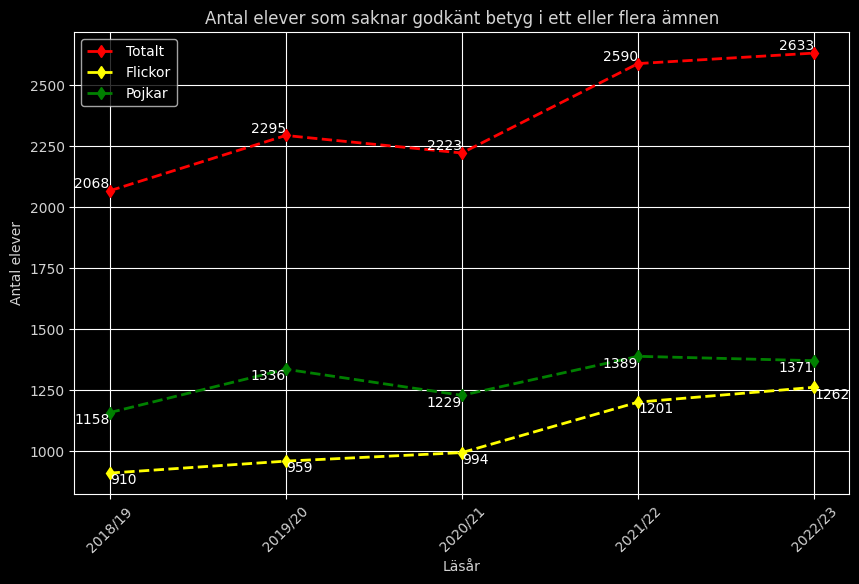

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df_1a = pd.read_excel("betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1A")

data_1a = df_1a.iloc[9:14].copy()

a_columns = [
    "Läsår",
    "Avslut åk 9 Totalt",
    "Flickor avslut",
    "Pojkar avslut",
    "Elever med slutbetyg totalt",
    "Flickor slutbetyg",
    "Pojkar slutbetyg",
    "Godkända slutbetyg totalt",
    "Flickor godkända",
    "Pojkar godkända",
]

data_1a.columns = a_columns

data_1a["Elever saknar godkänt betyg, totalt"] = (
    data_1a["Avslut åk 9 Totalt"] - data_1a["Godkända slutbetyg totalt"]
)
data_1a["Elever saknar godkänt betyg, flickor"] = (
    data_1a["Flickor avslut"] - data_1a["Flickor godkända"]
)
data_1a["Elever saknar godkänt betyg, pojkar"] = (
    data_1a["Pojkar avslut"] - data_1a["Pojkar godkända"]
)

plt.figure(figsize=(10, 6))
plt.plot(data_1a["Läsår"], data_1a["Elever saknar godkänt betyg, totalt"], marker="d", label="Totalt", color="red", linewidth=2, linestyle="--")
plt.plot(data_1a["Läsår"], data_1a["Elever saknar godkänt betyg, flickor"], marker="d", label="Flickor", color="yellow", linewidth=2, linestyle="--")
plt.plot(data_1a["Läsår"], data_1a["Elever saknar godkänt betyg, pojkar"], marker="d", label="Pojkar", color="green", linewidth=2, linestyle="--")

for i, txt in enumerate(data_1a["Elever saknar godkänt betyg, totalt"]):
    plt.text(data_1a["Läsår"].iloc[i], data_1a["Elever saknar godkänt betyg, totalt"].iloc[i], txt, ha="right", va="bottom")

for i, txt in enumerate(data_1a["Elever saknar godkänt betyg, flickor"]):
    plt.text(data_1a["Läsår"].iloc[i], data_1a["Elever saknar godkänt betyg, flickor"].iloc[i], txt, ha="left", va="top")

for i, txt in enumerate(data_1a["Elever saknar godkänt betyg, pojkar"]):
    plt.text(data_1a["Läsår"].iloc[i], data_1a["Elever saknar godkänt betyg, pojkar"].iloc[i], txt, ha="right", va="top")

plt.title("Antal elever som saknar godkänt betyg i ett eller flera ämnen", color="lightgray")
plt.xlabel("Läsår", color="lightgray")
plt.ylabel("Antal elever", color="lightgray")
plt.xticks(rotation=45, color="lightgray")
plt.yticks(color="lightgray")
plt.legend()
plt.grid(True, color="white")
plt.gca().set_facecolor("black")
plt.gca().spines["bottom"].set_color("white")
plt.gca().spines["top"].set_color("white")
plt.gca().spines["left"].set_color("white")
plt.gca().spines["right"].set_color("white")

plt.show()




In [11]:
#OBS MAKE IT INTO PLOTLY(DONE)

import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

df_1a = pd.read_excel("betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1A")

data_1a = df_1a.iloc[9:14].copy()

a_columns = [
    "Läsår",
    "Avslut åk 9 Totalt",
    "Flickor avslut",
    "Pojkar avslut",
    "Elever med slutbetyg totalt",
    "Flickor slutbetyg",
    "Pojkar slutbetyg",
    "Godkända slutbetyg totalt",
    "Flickor godkända",
    "Pojkar godkända",
]

data_1a.columns = a_columns

data_1a["Elever saknar godkänt betyg, totalt"] = (
    data_1a["Avslut åk 9 Totalt"] - data_1a["Godkända slutbetyg totalt"]
)
data_1a["Elever saknar godkänt betyg, flickor"] = (
    data_1a["Flickor avslut"] - data_1a["Flickor godkända"]
)
data_1a["Elever saknar godkänt betyg, pojkar"] = (
    data_1a["Pojkar avslut"] - data_1a["Pojkar godkända"]
)

fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Scatter(
        x=data_1a["Läsår"],
        y=data_1a["Elever saknar godkänt betyg, totalt"],
        mode="lines+markers+text",  
        name="Totalt",
        line=dict(color="red", width=2, dash="dash"),
        marker=dict(color="red", size=8),
        text=data_1a["Elever saknar godkänt betyg, totalt"].astype(str),  
        hoverinfo="text+x+y",
        textposition="top center" 
    )
)

fig.add_trace(
    go.Scatter(
        x=data_1a["Läsår"],
        y=data_1a["Elever saknar godkänt betyg, flickor"],
        mode="lines+markers+text",  
        name="Flickor",
        line=dict(color="yellow", width=2, dash="dash"),
        marker=dict(color="yellow", size=8),
        text=data_1a["Elever saknar godkänt betyg, flickor"].astype(str),  
        hoverinfo="text+x+y",
        textposition="top center"  
    )
)

fig.add_trace(
    go.Scatter(
        x=data_1a["Läsår"],
        y=data_1a["Elever saknar godkänt betyg, pojkar"],
        mode="lines+markers+text",  
        name="Pojkar",
        line=dict(color="green", width=2, dash="dash"),
        marker=dict(color="green", size=8),
        text=data_1a["Elever saknar godkänt betyg, pojkar"].astype(str),  
        hoverinfo="text+x+y",
        textposition="top center"  
    )
)

fig.update_layout(
    title="Antal elever som saknar godkänt betyg i ett eller flera ämnen",
    xaxis=dict(title="Läsår"),
    yaxis=dict(title="Antal elever"),
    plot_bgcolor="black",
    paper_bgcolor="black",
    font=dict(color="lightgray"),
    legend=dict(font=dict(color="lightgray")),
    margin=dict(t=60, b=10, l=60, r=10),
)

fig

# save as html


b) Rita ett linjediagram för meritvärde för 16 ämnen för totalt, flickor och pojkar för läsår 18-23.

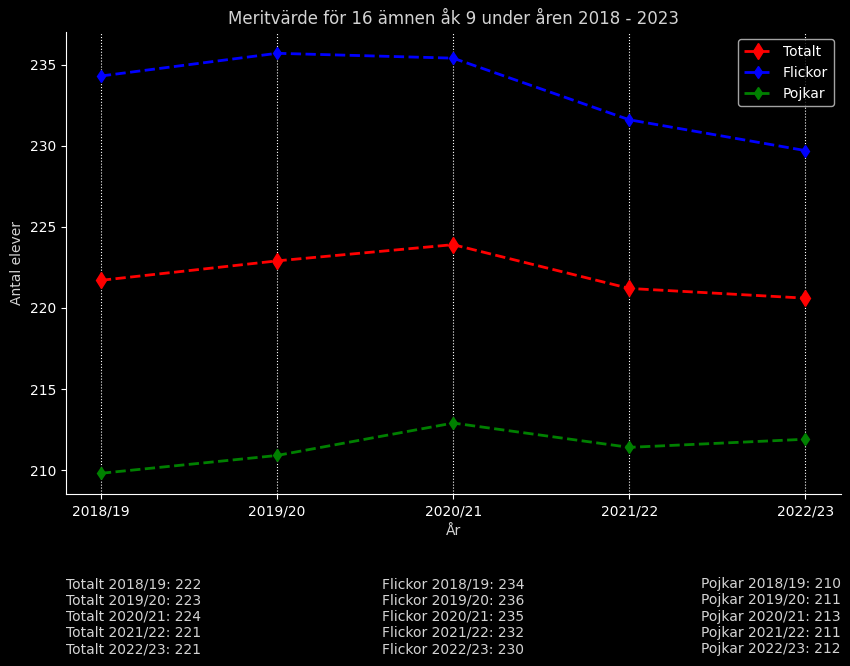

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df_1b = pd.read_excel("betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B")

data_1b = df_1b.iloc[7:13].copy()

b_columns = [
    "Läsår",
    "Medelvärde 16 ämnen totalt",
    "Medelvärde 16 ämnen flickor",
    "Medelvärde 16 ämnen pojkar",
    "Medelvärde 17 ämnen totalt",
    "Medelvärde 17 flickor",
    "Medelvärde 17 pojkar",
    "% Som saknar godkänt",
    "P Flickor",
    "P Pojkar",
]

data_1b.columns = b_columns

data_1b.dropna(inplace=True)

years = data_1b["Läsår"]
Mean_T = data_1b["Medelvärde 16 ämnen totalt"]
Mean_F = data_1b["Medelvärde 16 ämnen flickor"]
Mean_P = data_1b["Medelvärde 16 ämnen pojkar"]

plt.figure(figsize=(10, 6))

plt.plot(years, Mean_T, label="Totalt", marker="d", ms=8, ls="--", color='red', linewidth=2)
plt.plot(years, Mean_F, label="Flickor", marker="d", ls="--", color='blue', linewidth=2)
plt.plot(years, Mean_P, label="Pojkar", marker="d", ls="--", color='green', linewidth=2)

plt.title("Meritvärde för 16 ämnen åk 9 under åren 2018 - 2023", color='lightgray')
plt.xlabel("År", color='lightgray')
plt.ylabel("Antal elever", color='lightgray')
plt.grid(axis="x", ls=":", linewidth=0.8)
plt.legend()

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

text_total = [f'Totalt {year}: {round(val)}' for val, year in zip(Mean_T, years)]
text_female = [f'Flickor {year}: {round(val)}' for val, year in zip(Mean_F, years)]
text_male = [f'Pojkar {year}: {round(val)}' for val, year in zip(Mean_P, years)]

plt.text(
    0.0,
    -0.35,
    "\n".join(text_total),
    transform=ax.transAxes,
    ha="left",
    va="bottom",
    color="lightgray",
)
plt.text(
    0.5,
    -0.35,
    "\n".join(text_female),
    transform=ax.transAxes,
    ha="center",
    va="bottom",
    color="lightgray",
)
plt.text(
    1.0,
    -0.35,
    "\n".join(text_male),
    transform=ax.transAxes,
    ha="right",
    va="bottom",
    color="lightgray",
)

plt.show()


In [13]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

df_1b = pd.read_excel("betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B")

data_1b = df_1b.iloc[7:13].copy()

b_columns = [
    "Läsår",
    "Medelvärde 16 ämnen totalt",
    "Medelvärde 16 ämnen flickor",
    "Medelvärde 16 ämnen pojkar",
    "Medelvärde 17 ämnen totalt",
    "Medelvärde 17 flickor",
    "Medelvärde 17 pojkar",
    "% Som saknar godkänt",
    "P Flickor",
    "P Pojkar",
]

data_1b.columns = b_columns

data_1b.dropna(inplace=True)

years = data_1b["Läsår"]
Mean_T = data_1b["Medelvärde 16 ämnen totalt"]
Mean_F = data_1b["Medelvärde 16 ämnen flickor"]
Mean_P = data_1b["Medelvärde 16 ämnen pojkar"]

fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Scatter(
        x=years,
        y=Mean_T,
        mode="lines+markers+text",
        name="Totalt",
        marker=dict(color="red", size=8),
        text=[f'Totalt {year}: {round(val)}' for val, year in zip(Mean_T, years)],
        hoverinfo="text+x+y",
        textposition="top center"
    )
)

fig.add_trace(
    go.Scatter(
        x=years,
        y=Mean_F,
        mode="lines+markers+text",
        name="Flickor",
        marker=dict(color="blue", size=8),
        text=[f'Flickor {year}: {round(val)}' for val, year in zip(Mean_F, years)],
        hoverinfo="text+x+y",
        textposition="top center"
    )
)

fig.add_trace(
    go.Scatter(
        x=years,
        y=Mean_P,
        mode="lines+markers+text",
        name="Pojkar",
        marker=dict(color="green", size=8),
        text=[f'Pojkar {year}: {round(val)}' for val, year in zip(Mean_P, years)],
        hoverinfo="text+x+y",
        textposition="top center"
    )
)

fig.update_layout(
    title="Meritvärde för 16 ämnen åk 9 under åren 2018 - 2023",
    xaxis=dict(title="År"),
    yaxis=dict(title="Antal elever"),
    plot_bgcolor="black",
    paper_bgcolor="black",
    font=dict(color="lightgray"),
    legend=dict(font=dict(color="lightgray")),
    margin=dict(t=60, b=10, l=60, r=10),
)

fig.show()


c) Undersök nu andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data finns för
läsår 22/23. Exempel kan man undersöka föräldrarnas utbildningsbakgrund. Rita lämpliga grafer.

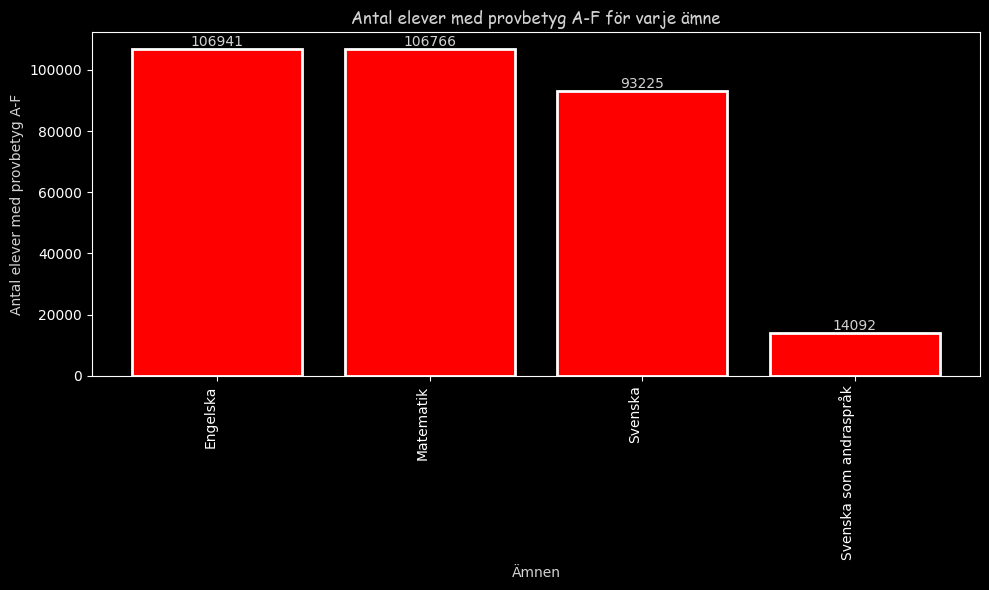

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('dark_background')

df_engelska = pd.read_excel("riket2023_åk9_np.xlsx", sheet_name="Engelska", skiprows=7)
df_matematik = pd.read_excel("riket2023_åk9_np.xlsx", sheet_name="Matematik", skiprows=7)
df_svenska = pd.read_excel("riket2023_åk9_np.xlsx", sheet_name="Svenska", skiprows=7)
df_svenska_som_andrasprak = pd.read_excel(
    "riket2023_åk9_np.xlsx", sheet_name="Svenska som andraspråk", skiprows=7
)

total_engelska = df_engelska.iloc[1, 2]  
total_matematik = df_matematik.iloc[1, 2]
total_svenska = df_svenska.iloc[1, 2]
total_svenska2 = df_svenska_som_andrasprak.iloc[1, 2]

labels = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]
totals = [total_engelska, total_matematik, total_svenska, total_svenska2]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, totals, color="red", edgecolor="white", linewidth=2)
plt.title("Antal elever med provbetyg A-F för varje ämne", color='lightgray', fontname="Comic Sans MS")
plt.xlabel("Ämnen", color='lightgray')
plt.ylabel("Antal elever med provbetyg A-F", color='lightgray')
plt.xticks(rotation=90, ha="right")
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height, f"{height}", ha="center", va="bottom", color='lightgray',
    )

plt.show()
